<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [170]:
import pandas as pd
import psycopg2

In [231]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [172]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [173]:
query_3_1 = f'''SELECT
                    COUNT(id)
                FROM public.vacancies
            '''

In [174]:
df = pd.read_sql_query(query_3_1, connection)
df


C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\4206390918.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [175]:
query_3_2 = f'''SELECT
                    COUNT(id)
                FROM public.employers
            '''

In [176]:
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\3588252056.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [177]:
query_3_3 = f'''SELECT
                    COUNT(id)
                FROM public.areas
            '''

In [178]:
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2018224393.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [179]:
query_3_4 = f'''SELECT
                    COUNT(id)
                FROM public.industries
            '''

In [180]:
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2172479966.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


**Выводы по предварительному анализу данных:**
+ *Высокая активность на рынке труда:* почти 50 тысяч вакансий свидетельствуют о масштабной базе и активном спросе на персонал.

+ *Разнообразие работодателей:* 23501 уникальных компаний указывает на широкий спектр организаций, участвующих в подборе персонала.

+ *Географическое покрытие:* 1362 города, что говорит о хорошем территориальном охвате и возможности анализа по локациям.

+ *Сферы деятельности:* 294 направления — это богатая классификация, позволяющая сегментировать рынок по отраслям, выявлять тренды и дефицитные компетенции.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [181]:
query_4_1 = f'''SELECT
                    a.name AS area,
                    COUNT(v.id) AS cnt
                FROM public.areas a
                    JOIN public.vacancies v ON a.id = v.area_id
                GROUP BY a.name
                ORDER BY cnt DESC
            '''

In [182]:
df_1 = pd.read_sql_query(query_4_1, connection)
df_1

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2494968384.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [183]:
query_4_2 = f'''SELECT
                    COUNT(id) AS cnt
                FROM public.vacancies
                WHERE (salary_from IS NOT NULL) OR (salary_to IS NOT NULL)
            '''

In [184]:
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2168503709.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [185]:
query_4_3 = f'''SELECT
                    AVG(salary_from) AS avg_salary_from,
                    AVG(salary_to) AS avg_salary_to
                FROM public.vacancies
                WHERE (salary_from IS NOT NULL) OR (salary_to IS NOT NULL)
            '''

In [186]:
df = pd.read_sql_query(query_4_3, connection)
df_rounded = df.round(0).astype(int)
df_rounded

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1731865676.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [187]:
query_4_4 = f'''SELECT
                    schedule,
                    employment,
                    COUNT(id)
                FROM public.vacancies
                GROUP BY schedule, employment
                ORDER BY COUNT(id) DESC
            '''

In [188]:
df_4 = pd.read_sql_query(query_4_4, connection)
df_4

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\3165095594.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [189]:
query_4_5 = f'''SELECT
                    experience,
                    COUNT(id)
                FROM public.vacancies
                GROUP BY experience
                ORDER BY COUNT(id) ASC
            '''

In [190]:
df_5 = pd.read_sql_query(query_4_5, connection)
df_5

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1838393331.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5 = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

**Выводы по детальному анализу вакансий:**
+ *Географическая концентрация* — Москва и крупные города лидируют, но вакансии есть даже в малых населённых пунктах.

+ *Зарплаты* — диапазон широкий, средняя «вилка» ~71–110 тыс., что отражает разницу в требованиях и опыте.

+ *Форматы работы* — полный день и полная занятость доминируют, но удалёнка уверенно занимает второе место.

+ *Опыт* — основной спрос на специалистов с 1–3 годами опыта, но рынок открыт и для новичков.


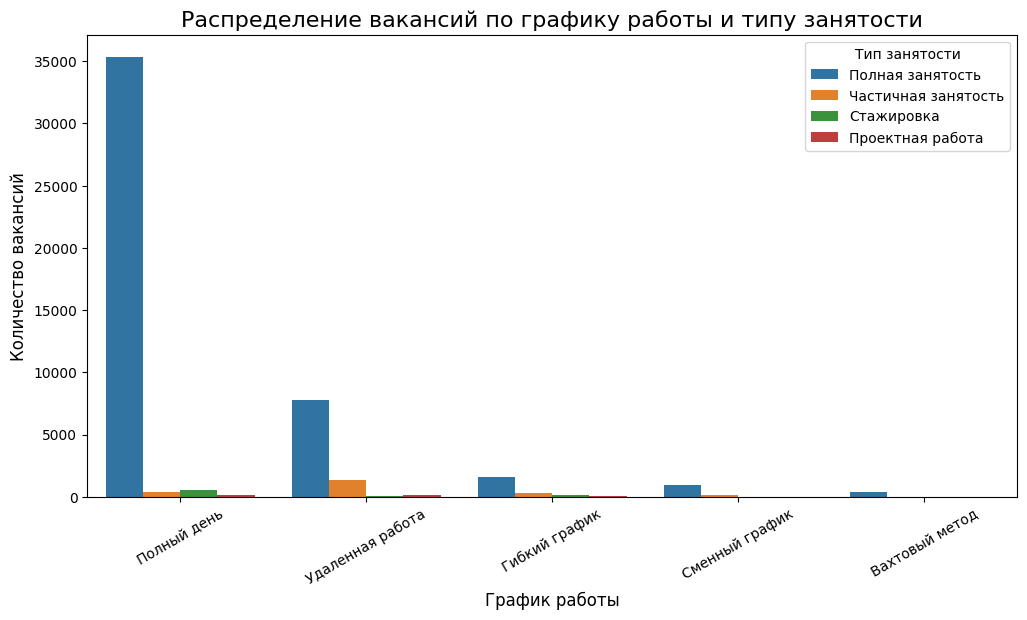

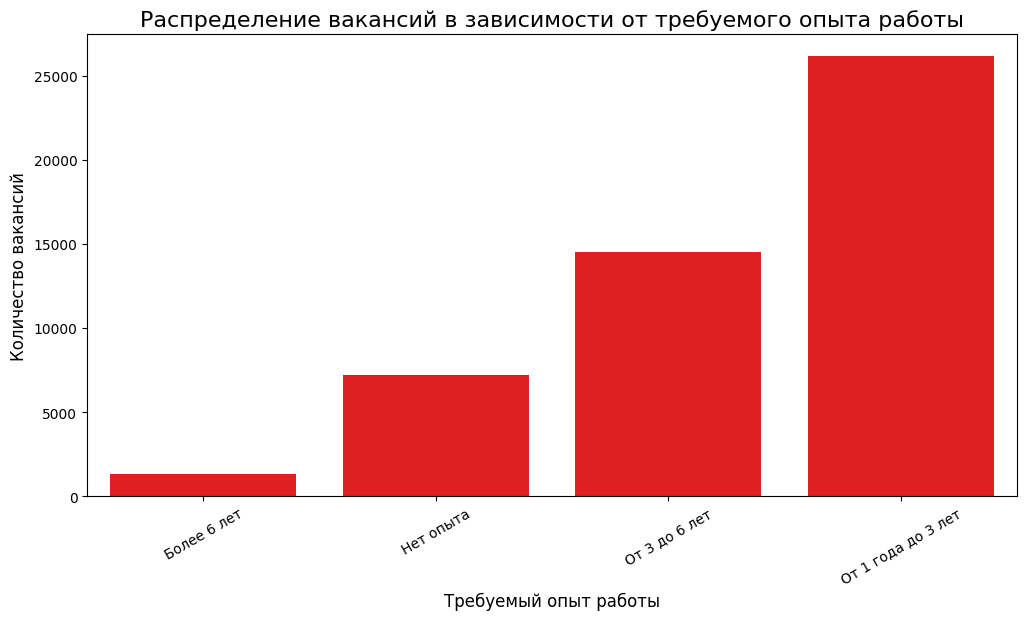

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
barplot = sns.barplot( 
    data=df_4,
    x='schedule',
    y='count',
    hue='employment'
);
barplot.set_title("Распределение вакансий по графику работы и типу занятости", fontsize=16)
barplot.set_xlabel("График работы", fontsize=12)
barplot.set_ylabel("Количество вакансий", fontsize=12)
barplot.tick_params(axis='x', rotation=30)
barplot.legend(title="Тип занятости")

fig_2 = plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_5,
    x='experience',
    y='count',
    color='red'
);
barplot.set_title("Распределение вакансий в зависимости от требуемого опыта работы", fontsize=16)
barplot.set_xlabel("Требуемый опыт работы", fontsize=12)
barplot.set_ylabel("Количество вакансий", fontsize=12)
barplot.tick_params(axis='x', rotation=30)

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [192]:
query_5_1 = f'''SELECT
                    e.name,
                    COUNT(v.id)
                FROM public.employers e
                    JOIN public.vacancies v ON e.id = v.employer_id
                GROUP BY e.name
                ORDER BY COUNT(v.id) DESC
                LIMIT 5
            '''

In [193]:
df_1 = pd.read_sql_query(query_5_1, connection)
df_1

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1675353308.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [194]:
query_5_2 = f'''SELECT
                    a.name,
                    COUNT(e.id) AS cnt_employers,
                    COUNT(v.id) AS cnt_vacancies
                FROM public.areas a
                    LEFT JOIN public.employers e ON a.id = e.area
                    LEFT JOIN public.vacancies v ON a.id = v.area_id
                GROUP BY a.name
                HAVING COUNT(v.id) = 0
                ORDER BY cnt_employers DESC
                LIMIT 1                
            '''

In [195]:
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\3341481329.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,name,cnt_employers,cnt_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [196]:
query_5_3 = f'''SELECT
                    e.name,
                    COUNT(DISTINCT v.area_id) AS cnt
                FROM public.employers e
                    JOIN public.vacancies v ON e.id = v.employer_id
                GROUP BY e.name
                ORDER BY cnt DESC
            '''

In [197]:
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2398953733.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,name,cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [198]:
query_5_4 = f'''SELECT
                    COUNT(e.name) AS cnt_employers
                FROM public.employers e
                    LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
                    LEFT JOIN public.industries i ON i.id = ei.industry_id
                WHERE i.name IS NULL
            '''

In [199]:
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\3114411492.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,cnt_employers
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [200]:
query_5_5 = f'''SELECT
                    e.name AS name_employers,
                    COUNT(i.name) AS cnt_name_industry
                FROM public.employers e
                    JOIN public.employers_industries ei ON e.id = ei.employer_id
                    JOIN public.industries i ON i.id = ei.industry_id
                GROUP BY name_employers
                HAVING COUNT(i.name) = 4
                ORDER BY name_employers
                LIMIT 1 OFFSET 2
            '''

In [201]:
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1650419958.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name_employers,cnt_name_industry
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [202]:
query_5_6 = f'''SELECT
                    COUNT(e.id) AS cnt_employers
                FROM public.employers e
                    JOIN public.employers_industries ei ON e.id = ei.employer_id
                    JOIN public.industries i ON i.id = ei.industry_id
                WHERE i.name = 'Разработка программного обеспечения'
            '''   

In [203]:
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1169039133.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,cnt_employers
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [204]:
import requests
from io import StringIO

url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
}
response = requests.get(url, headers=headers)
html = response.text
tables = pd.read_html(StringIO(html))

df = tables[0]
cities = df['Город'].tolist()
print(cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [205]:
city_list = "', '".join(cities)
query_5_7 = f'''WITH city_vacancies AS (
                    SELECT
                        a.name AS name_city,
                        COUNT(v.id) AS cnt_vacancies
                    FROM public.areas a
                        JOIN public.vacancies v ON a.id = v.area_id
                        JOIN public.employers e ON e.id = v.employer_id
                    WHERE e.name = 'Яндекс' AND a.name IN ('{city_list}')
                    GROUP BY name_city
                    ORDER BY cnt_vacancies ASC
                )
                SELECT *
                FROM city_vacancies
                
                UNION ALL
                
                SELECT
                    'Total',
                    SUM(cnt_vacancies)
                FROM city_vacancies
            '''   

In [206]:
df = pd.read_sql_query(query_5_7, connection)
df['cnt_vacancies'] = df['cnt_vacancies'].astype(int)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1108080695.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,name_city,cnt_vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

**Выводы по анализу работодателей:**
+ *Яндекс* — безусловный лидер как по объёму вакансий, так и по географическому охвату. Спрос концентрирован в Москве и Санкт‑Петербурге, но устойчиво присутствует во всех городах‑миллионниках.

+ *Корпоративные гиганты и региональные игроки:* в топе по охвату присутствуют не только крупные корпорации (Ростелеком), но и компании с ярко выраженным региональным следом (Спецремонт, ИП/самозанятые, ООО ЕФИН), что говорит о значимой роли средних работодателей в локальных рынках.

+ *Рынок ИТ*: большое число компаний в «Разработке ПО» подтверждает высокий спрос на ИТ‑навыки.

+ *Роль регионов значима:* заметное количество вакансий в Казани, Самаре, Уфе, Перми и Ростове‑на‑Дону указывает на широту распределённых команд и локальных продуктовых направлений.

+ *Данные требуют доработки для точной отраслевой аналитики:* классификационные пробелы (пропуски в сферах деятельности) и мультисферность компаний снижают чистоту срезов; нормализация таксономии повысит точность выводов.

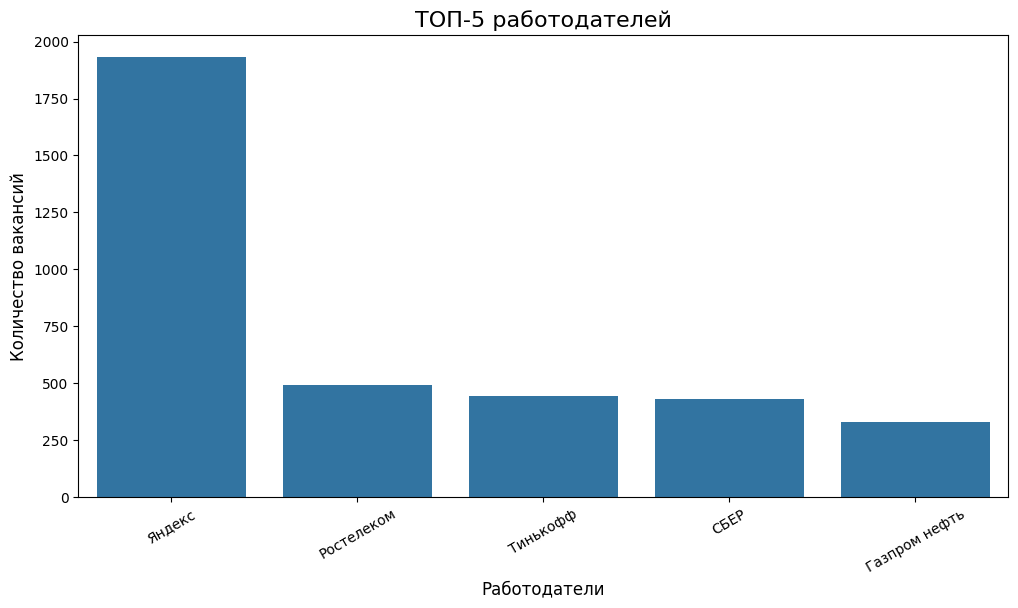

In [207]:
fig = plt.figure(figsize=(12, 6))
barplot = sns.barplot( 
    data=df_1,
    x='name',
    y='count'
);
barplot.set_title("ТОП-5 работодателей", fontsize=16)
barplot.set_xlabel("Работодатели", fontsize=12)
barplot.set_ylabel("Количество вакансий", fontsize=12)
barplot.tick_params(axis='x', rotation=30)

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [208]:
query_6_1 = f'''SELECT
                    COUNT(v.name) AS cnt_vacancies
                FROM public.vacancies v
                WHERE LOWER(v.name) LIKE '%data%' OR LOWER(v.name) LIKE '%данн%'
            '''   

In [209]:
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\485020324.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,cnt_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [210]:
keywords = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']
pattern = "', '".join(keywords)
query_6_2 = f'''SELECT
                    COUNT(v.name) AS cnt_vacancies
                FROM public.vacancies v
                WHERE (v.name ILIKE ANY (ARRAY['{pattern}'])
                  OR v.name ILIKE '%ML%')
                  AND v.name NOT ILIKE '%HTML%'
                  AND (
                        LOWER(v.name) LIKE '%junior%'
                        OR v.experience = 'Нет опыта'
                        OR v.employment = 'Стажировка'
                      )
            '''   

In [211]:
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\3641650667.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,cnt_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [212]:
query_6_3 = f'''SELECT
                    COUNT(v.name) AS cnt_vacancies
                FROM public.vacancies v
                WHERE (v.name ILIKE ANY (ARRAY['{pattern}'])
                  OR v.name ILIKE '%ML%')
                  AND v.name NOT ILIKE '%HTML%'
                  AND (
                        v.key_skills ILIKE '%SQL%'
                        OR v.key_skills ILIKE '%postgres%'
                      )
            '''   

In [213]:
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1159587760.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,cnt_vacancies
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [214]:
query_6_4 = f'''SELECT
                    COUNT(v.name) AS cnt_vacancies
                FROM public.vacancies v
                WHERE (v.name ILIKE ANY (ARRAY['{pattern}'])
                  OR v.name ILIKE '%ML%')
                  AND v.name NOT ILIKE '%HTML%'
                  AND v.key_skills LIKE '%Python%'
            '''   

In [215]:
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\972386973.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,cnt_vacancies
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [216]:
query_6_5 = f'''SELECT
                    ROUND(
                      AVG(
                         LENGTH(v.key_skills) - LENGTH(REPLACE(v.key_skills, CHR(9), '')) + 1
                      ), 2
                    ) AS avg_skills
                FROM public.vacancies v
                WHERE (v.name ILIKE ANY (ARRAY['{pattern}'])
                  OR v.name LIKE '%ML%')
                  AND v.name NOT ILIKE '%HTML%'
                  AND v.key_skills IS NOT NULL
            '''   

In [217]:
df = pd.read_sql_query(query_6_5, connection)
df         

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\1149688463.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [218]:
query_6_6 = f'''SELECT
                    v.experience,
                    ROUND(
                      AVG(
                        CASE                                -- CASE проверяет, заполнены ли оба поля зарплаты:
                          WHEN                              -- если да → берём среднее (salary_from + salary_to)/2
                          v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL
                            THEN (v.salary_from + v.salary_to)/2
                          ELSE COALESCE(v.salary_from, v.salary_to) -- если нет → берём одно из них через COALESCE
                        END
                      )
                    ) AS avg_salary
                FROM public.vacancies v
                WHERE (v.name ILIKE ANY (ARRAY['{pattern}'])
                  OR v.name LIKE '%ML%')
                  AND v.name NOT ILIKE '%HTML%'
                  AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
                GROUP BY v.experience
            '''   

In [219]:
df_6 = pd.read_sql_query(query_6_6, connection)
df_6     

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\562560171.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6 = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

**Выводы по предметному анализу:**
+ *Сегмент "работа с данными" в России активно развивается* — почти 1800 вакансий, что делает направление одним из ключевых в IT.

+ *Входной порог DS высокий:* вакансий для начинающих мало, поэтому новичкам важно заранее формировать портфолио и практические проекты.

+ *Python* — основной язык DS, но *SQL* остаётся обязательным навыком. Владение обоими значительно повышает конкурентоспособность.

+ *Комплексность требований:* среднее количество навыков >6 показывает, что работодатели ищут «универсальных специалистов», способных работать с данными на всех этапах (сбор, хранение, анализ, визуализация, ML).

+ *Зарплатная динамика:* опыт в DS быстро капитализируется, и уже через 3–6 лет можно выйти на уровень зарплаты более 240 тыс.руб.

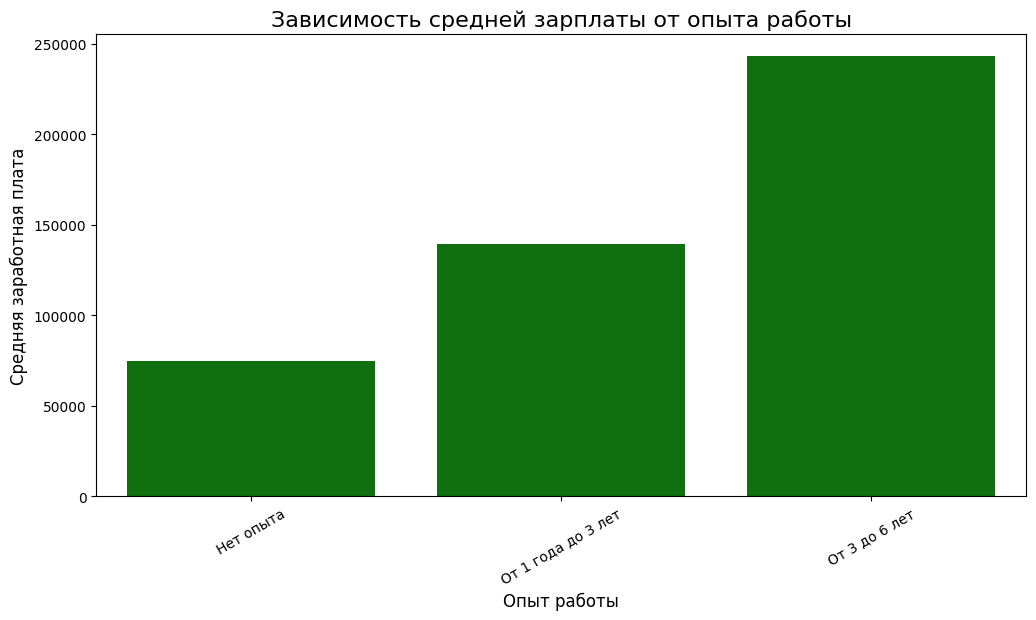

In [220]:
fig = plt.figure(figsize=(12, 6))
barplot = sns.barplot( 
    data=df_6,
    x='experience',
    y='avg_salary',
    color='green'
);
barplot.set_title("Зависимость средней зарплаты от опыта работы", fontsize=16)
barplot.set_xlabel("Опыт работы", fontsize=12)
barplot.set_ylabel("Средняя заработная плата", fontsize=12)
barplot.tick_params(axis='x', rotation=30)

## Юнит 7. Дополнительные исследования данных

1. Узнаем, каких  вакансий представлено больше всего

In [221]:
query_7_1 = f'''SELECT
                    CASE -- условная замена, мы явно объединяем разные варианты написания вакансии
                      WHEN name ILIKE 'Программист 1C' OR name ILIKE 'Программист 1с'
                        THEN 'Программист 1С' 
                      ELSE name 
                    END AS normalized_name,
                    COUNT(id) AS vacancy_count
                FROM public.vacancies
                GROUP BY normalized_name
                ORDER BY vacancy_count DESC
                LIMIT 40
            ''' 

In [222]:
df = pd.read_sql_query(query_7_1, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2911634181.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_1, connection)


,normalized_name,vacancy_count
0,Системный администратор,1761
1,Программист 1С,1528
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Frontend-разработчик,242
8,Инженер технической поддержки,230
9,Программист,224


2. Выясним на какую заработную плату может рассчитывать 'Системный администратор' в зависимости от опыта работы

In [223]:
query_7_2 = f'''SELECT
                    v.experience,
                    ROUND(
                      AVG(
                        CASE                                -- CASE проверяет, заполнены ли оба поля зарплаты:
                          WHEN                              -- если да → берём среднее (salary_from + salary_to)/2
                          v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL
                            THEN (v.salary_from + v.salary_to)/2
                          ELSE COALESCE(v.salary_from, v.salary_to) -- если нет → берём одно из них через COALESCE
                        END
                      )
                    ) AS avg_salary
                FROM public.vacancies v
                WHERE v.name ILIKE 'Системный администратор'
                  AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
                GROUP BY v.experience
                ORDER BY avg_salary
            '''   

In [224]:
df = pd.read_sql_query(query_7_2, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2993136978.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_2, connection)


,experience,avg_salary
0,Нет опыта,41628.0
1,От 1 года до 3 лет,48031.0
2,От 3 до 6 лет,57899.0
3,Более 6 лет,73726.0


3. Выясним на какую заработную плату может рассчитывать 'Программист 1С' в зависимости от опыта работы

In [225]:
query_7_3 = f'''SELECT
                    v.experience,
                    ROUND(
                      AVG(
                        CASE                                -- CASE проверяет, заполнены ли оба поля зарплаты:
                          WHEN                              -- если да → берём среднее (salary_from + salary_to)/2
                          v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL
                            THEN (v.salary_from + v.salary_to)/2
                          ELSE COALESCE(v.salary_from, v.salary_to) -- если нет → берём одно из них через COALESCE
                        END
                      )
                    ) AS avg_salary
                FROM public.vacancies v
                WHERE v.name ILIKE 'Программист 1С'
                  AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
                GROUP BY v.experience
                ORDER BY avg_salary
            '''   

In [226]:
df = pd.read_sql_query(query_7_3, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\2328698441.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_3, connection)


,experience,avg_salary
0,Нет опыта,81785.0
1,От 1 года до 3 лет,96382.0
2,От 3 до 6 лет,130221.0
3,Более 6 лет,161951.0


4. Выясним, сколько работодателей и вакансий в каждом регионе.

In [227]:
query_7_4 = f'''WITH employers_count AS ( -- отдельно считаем количество работодателей (cnt_employers) в каждом регионе (area)
                    SELECT area, COUNT(*) AS cnt_employers
                    FROM public.employers
                    GROUP BY area
                ),
                vacancies_count AS ( -- отдельно считаем количество вакансий (cnt_vacancies) в каждом регионе (area_id)
                    SELECT area_id, COUNT(*) AS cnt_vacancies
                    FROM public.vacancies
                    GROUP BY area_id
                )
                SELECT a.name,
                       COALESCE(e.cnt_employers, 0) AS cnt_employers, --присоединяем количество работодателей из employers_count
                       COALESCE(v.cnt_vacancies, 0) AS cnt_vacancies  --присоединяем количество вакансий из vacancies_count
                FROM public.areas a                                   --если данных нет, подставляем 0 (через COALESCE)
                    LEFT JOIN employers_count e ON a.id = e.area
                    LEFT JOIN vacancies_count v ON a.id = v.area_id
                ORDER BY cnt_employers DESC
            '''

In [228]:
df = pd.read_sql_query(query_7_4, connection)
df.head(20)

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\362155348.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_4, connection)


,name,cnt_employers,cnt_vacancies
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Алматы,721,1892
4,Екатеринбург,609,1698
5,Новосибирск,573,2006
6,Казань,480,1415
7,Нижний Новгород,426,1670
8,Россия,410,0
9,Краснодар,409,1301


5. Выясним количество вакансий по Data Science

In [229]:
query_7_5 = f'''SELECT
                    COUNT(v.name) AS cnt_vacancies
                FROM public.vacancies v
                WHERE (v.name ILIKE ANY (ARRAY['{pattern}'])
                  OR v.name ILIKE '%ML%')
                  AND v.name NOT ILIKE '%HTML%'
            '''   

In [230]:
df = pd.read_sql_query(query_7_5, connection)
df

C:\Users\Sava Sink\AppData\Local\Temp\ipykernel_9924\466817877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_5, connection)


,cnt_vacancies
0,536


# Общие выводы по проекту:
### 1. Data Science как узкая специализация (536 вакансий) уже уверенно конкурирует с ключевыми аналитическими и инженерными позициями. Широкий сегмент «работа с данными» (1771) фактически является крупнейшей группой на рынке, сравнимой с «Системным администратором» (1761) и даже превосходящим «Программист 1С» (1528), что подтверждает стратегический тренд: компании всё больше инвестируют в аналитику и AI. Спрос на специалистов по данным не только высок, но и диверсифицирован: от классических аналитиков до специалистов по машинному обучению.
### 2. Москва и крупные города лидируют по количеству работодателей и вакансий, но вакансии есть даже в малых населённых пунктах. Крупные корпорации лидируют как по объёму вакансий, так и по географическому охвату, но в топе по охвату присутствуют и компании с ярко выраженным региональным следом, что говорит о значимой роли средних работодателей в локальных рынках. Минск и Алматы — важные международные хабы, конкурирующие по числу вакансий с крупнейшими российскими городами.
### 3. Форматы работы — полный день и полная занятость доминируют, но удалёнка уверенно занимает второе место.
### 4. Комплексность требований: среднее количество навыков >6 показывает, что работодатели ищут «универсальных специалистов», способных работать с данными на всех этапах (сбор, хранение, анализ, визуализация, ML).
### 5. Data Science — не только самый востребованный сегмент по количеству вакансий «работа с данными», но и самый высокооплачиваемый при накоплении опыта. Это подтверждает стратегический тренд: компании готовы платить больше за специалистов по данным.
### 6. Данные требуют доработки для точной аналитики: классификационные пробелы (пропуски в сферах деятельности) и мультисферность компаний снижают чистоту срезов; нормализация таксономии (вакансии, сферы деятельности, регионы): объединение дублей, выравнивание уровней (например, «Менеджер проектов» и «Руководитель проекта»), уточнение категорий (разделение «Программист» на конкретные языки), удаление агрегированных записей повысит точность выводов.
### 7. В последующем можно провести анализ рапределения вакансий Data Science по регионам, сравнить зарплаты в зависимости от опыта работы в различных регионах, зависимости зарплаты от формата работы в различных регионах.